<a href="https://colab.research.google.com/github/OJB-Quantum/QC-Hardware-How-To/blob/main/Jupyter%20Notebook%20Scripts/Collective_Excitations_for_Superconductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of Collective Excitations for Superconductors

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

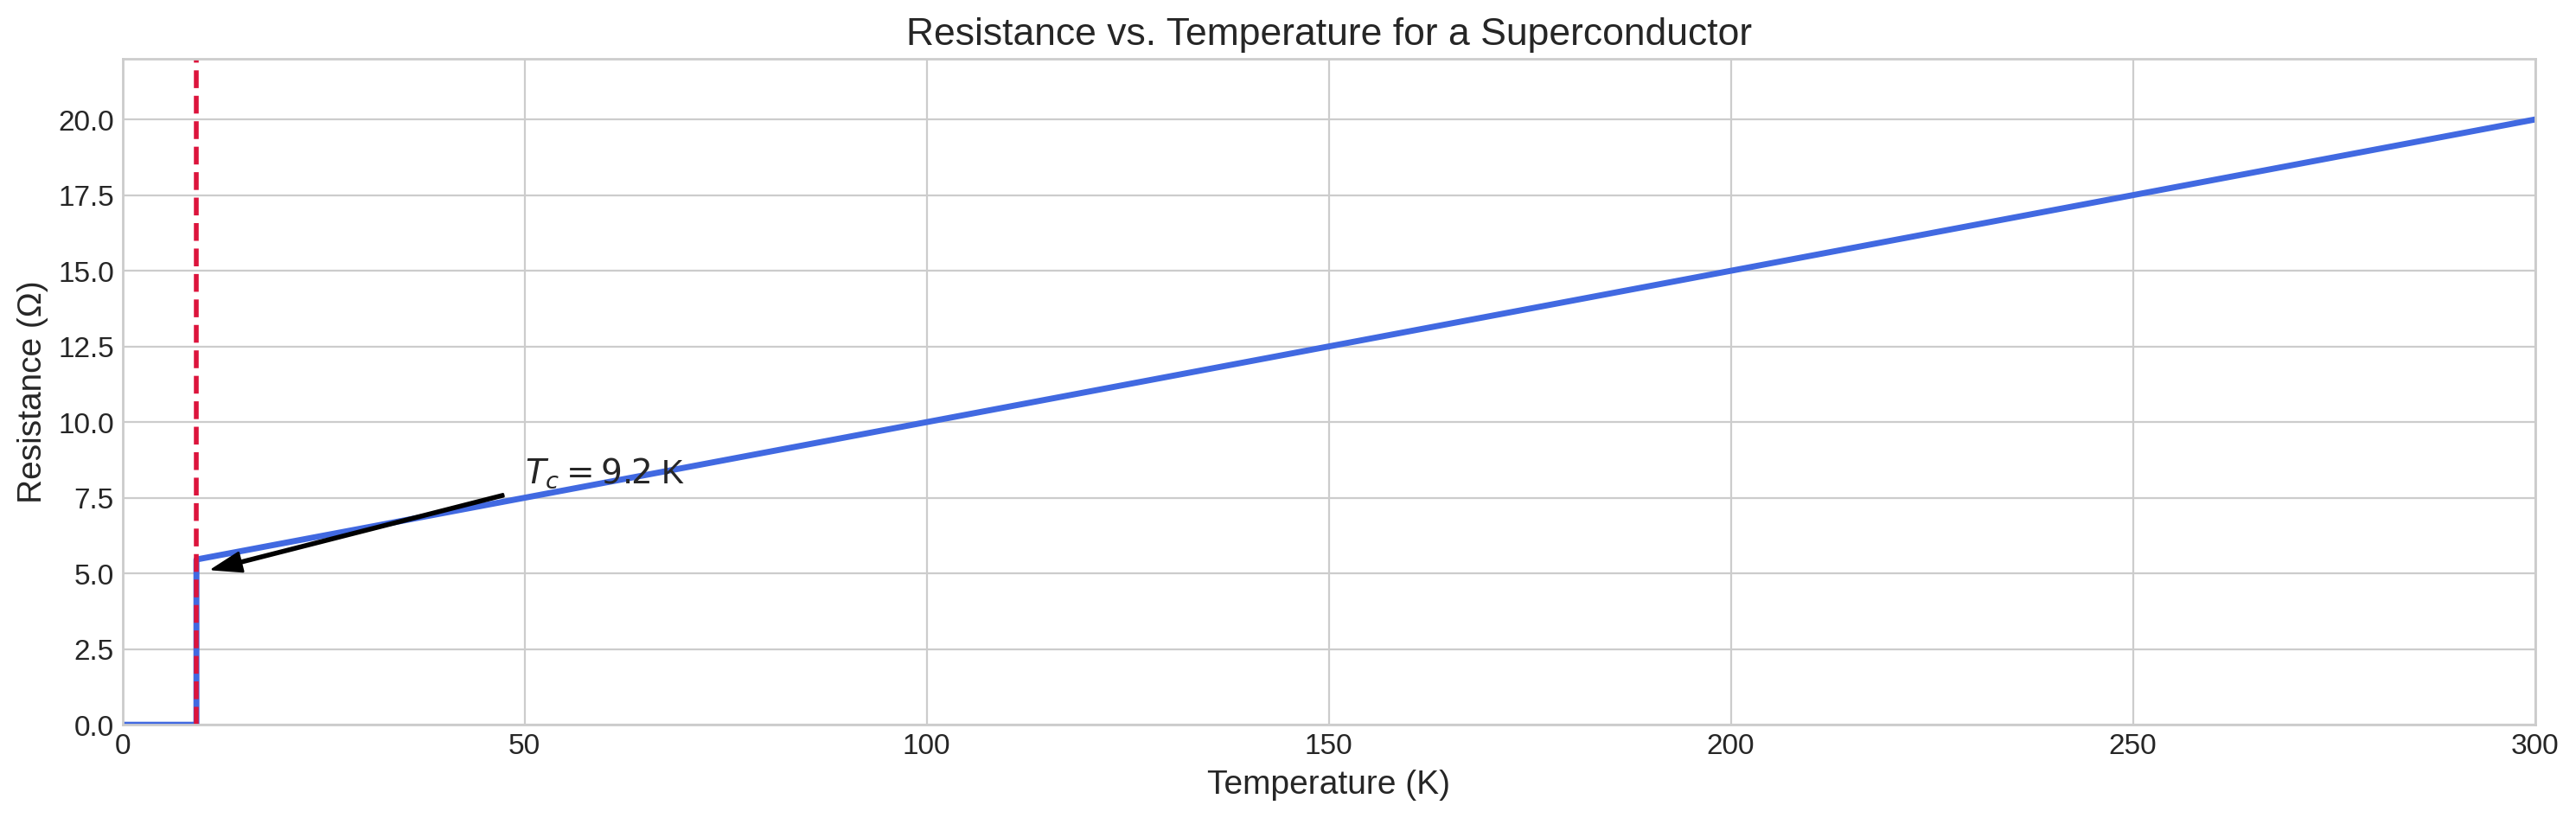

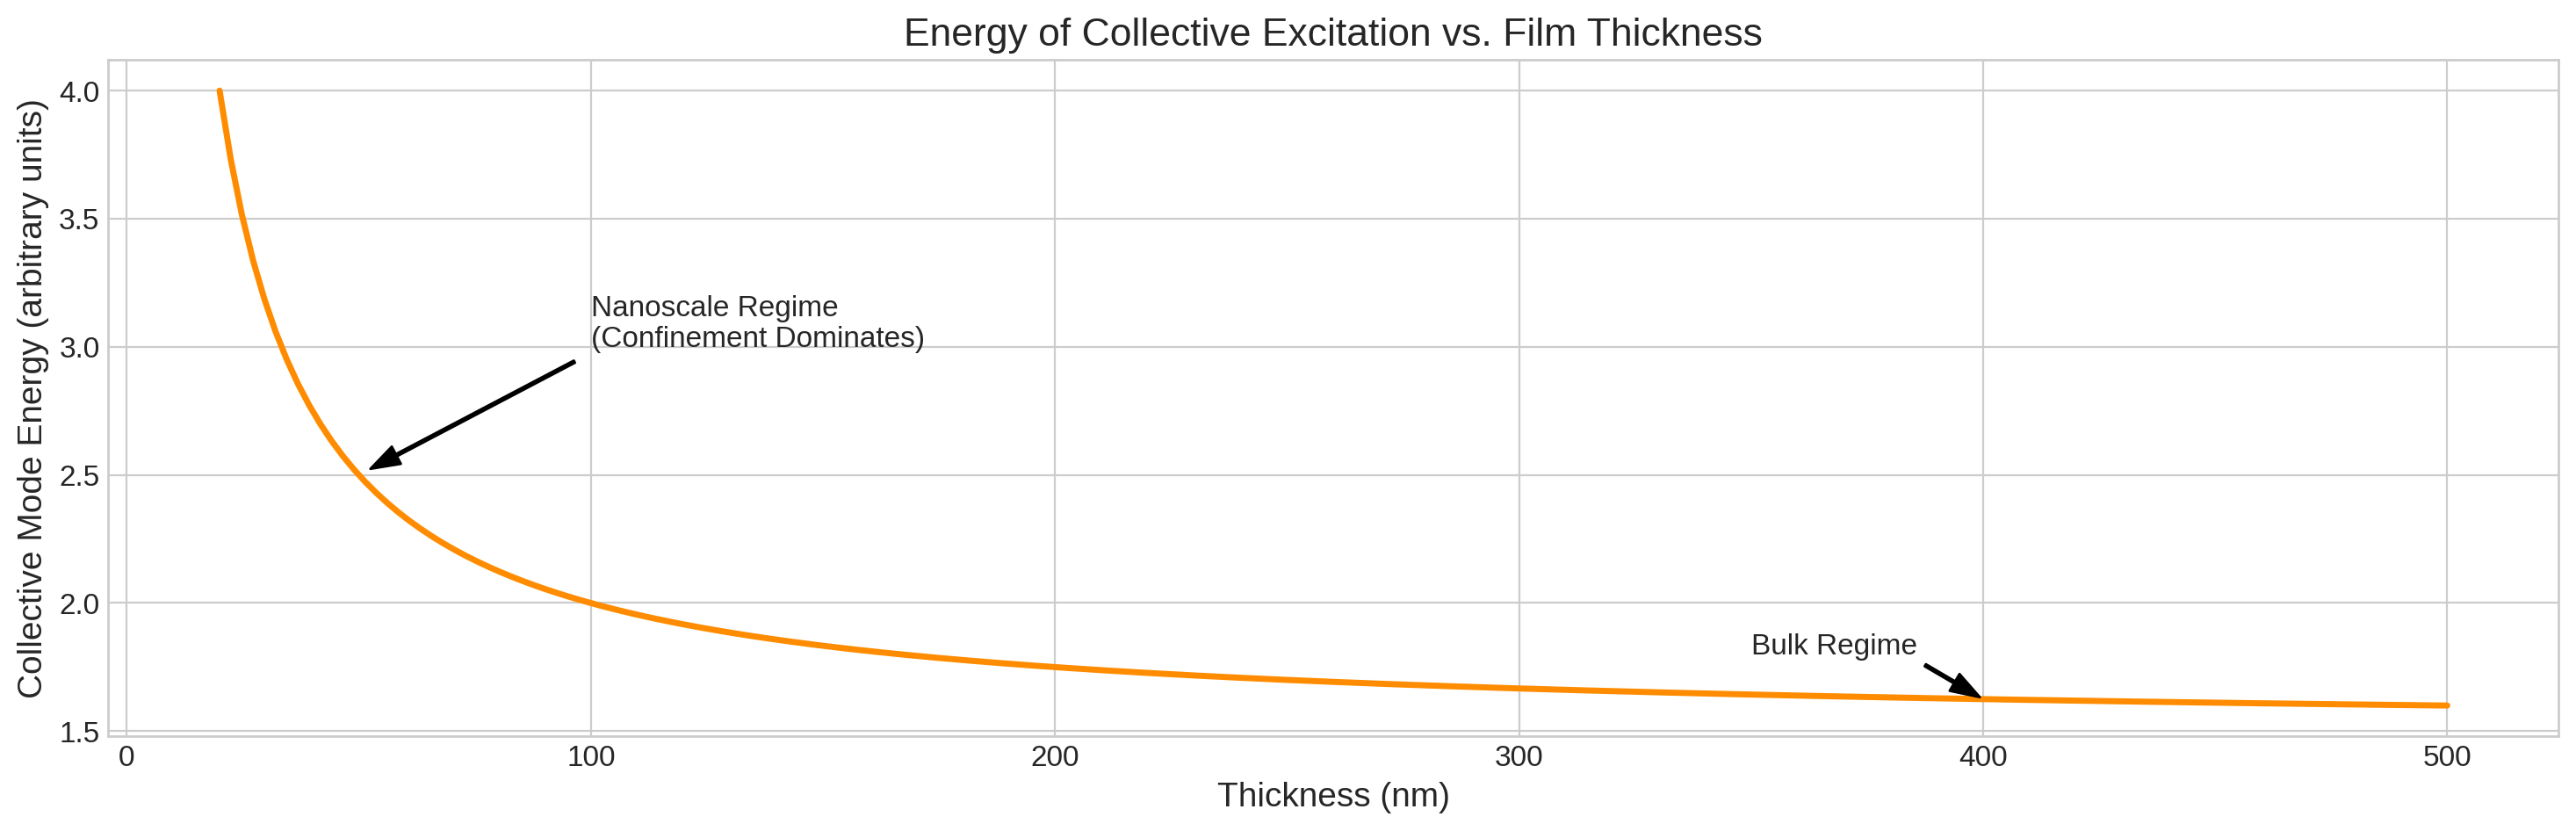

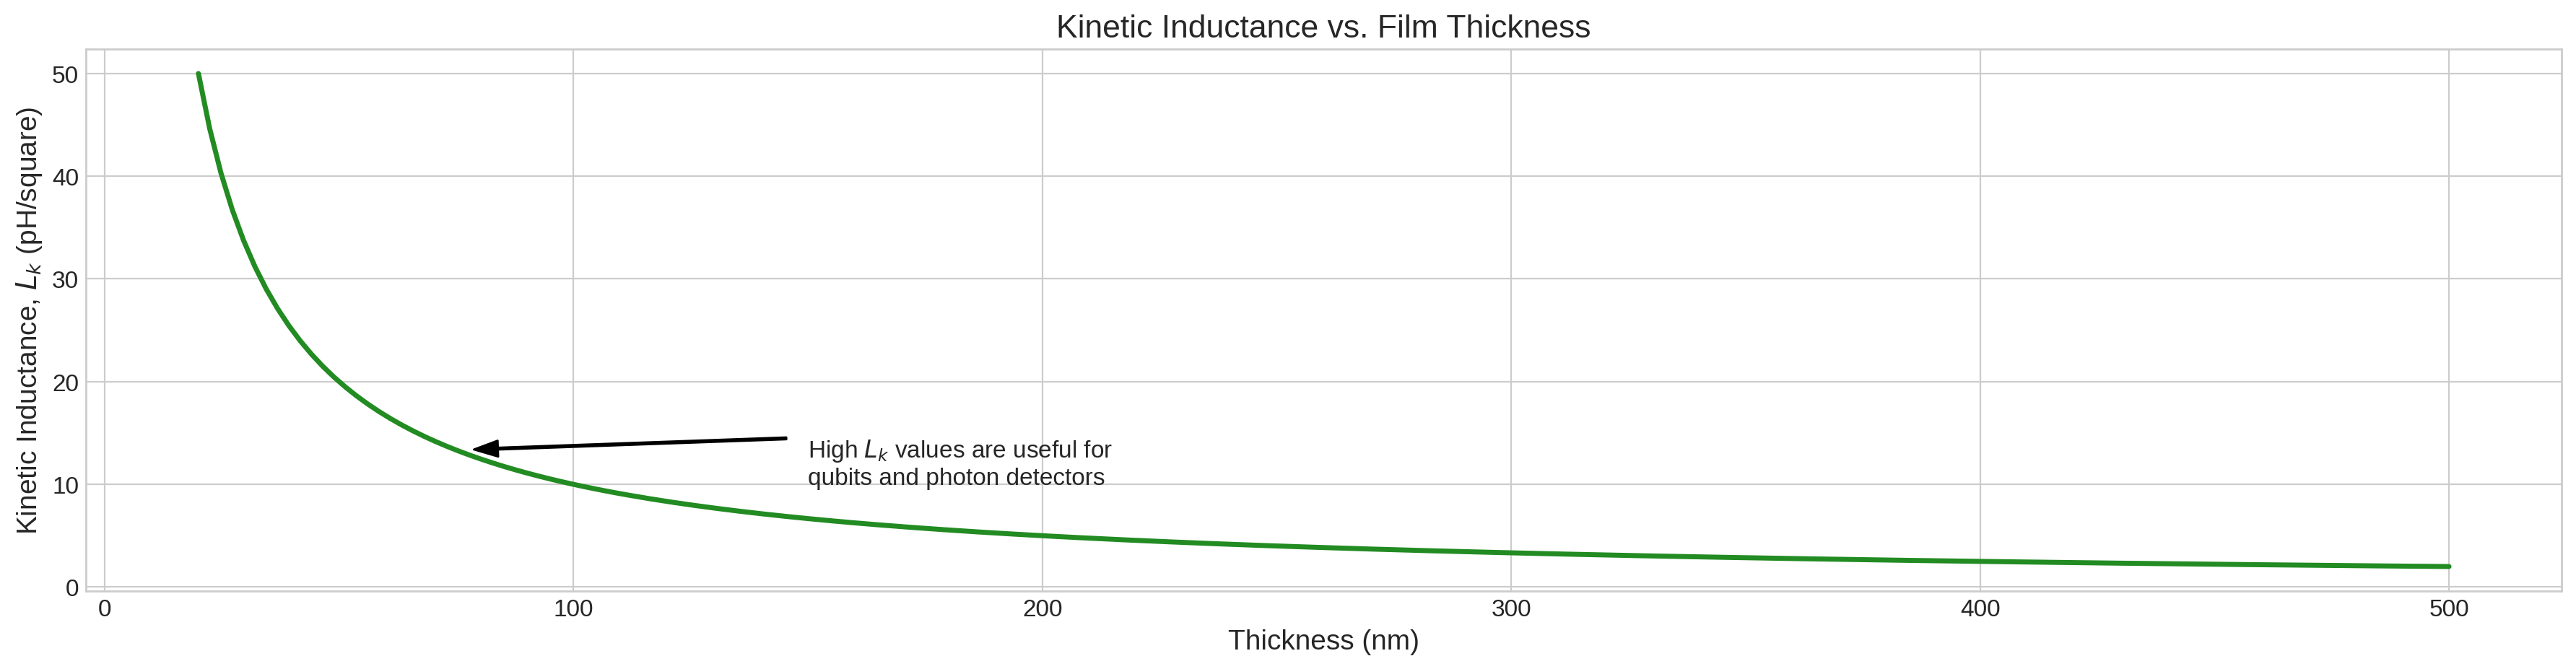

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a professional plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.figsize': (18, 5),
    'figure.dpi': 200
})
# --- Plot 1: Superconducting Transition ---
# This plot shows the resistance of a material dropping to zero at its
# critical temperature (Tc).

fig1, ax1 = plt.subplots(1, 1)

Tc = 9.2  # Critical temperature for Niobium (in Kelvin)
T_normal = np.linspace(Tc, 300, 400)
R_normal = 5 + 0.05 * T_normal # Simplified linear resistance of a normal metal

T_superconducting = np.linspace(0, Tc, 100)
R_superconducting = np.zeros_like(T_superconducting)

# Combine the data for plotting
T_full = np.concatenate([T_superconducting, T_normal])
R_full = np.concatenate([R_superconducting, R_normal])

ax1.plot(T_full, R_full, color='royalblue', linewidth=2.5)
ax1.set_title('Resistance vs. Temperature for a Superconductor')
ax1.set_xlabel('Temperature (K)')
ax1.set_ylabel('Resistance (Ω)')
ax1.set_xlim(0, 300)
ax1.set_ylim(0, np.max(R_full) * 1.1)

# Annotate the critical temperature
ax1.axvline(x=Tc, color='crimson', linestyle='--', linewidth=2)
ax1.annotate(f'$T_c = {Tc}$ K', xy=(Tc, 5), xytext=(50, 8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=14)
ax1.grid(True)


# --- Plot 2: Collective Excitations vs. Thickness ---
# This plot conceptually shows how the energy of a collective mode, like a
# plasmon, increases as the superconductor film gets thinner due to confinement.

fig2, ax2 = plt.subplots(1, 1)

thickness = np.linspace(20, 500, 200) # Thickness in nanometers
E_bulk = 1.5 # Bulk energy of the mode
confinement_factor = 50

# Energy increases as thickness decreases (E ~ 1/d)
E_mode = E_bulk + confinement_factor / thickness

ax2.plot(thickness, E_mode, color='darkorange', linewidth=2.5)
ax2.set_title('Energy of Collective Excitation vs. Film Thickness')
ax2.set_xlabel('Thickness (nm)')
ax2.set_ylabel('Collective Mode Energy (arbitrary units)')
ax2.annotate('Bulk Regime', xy=(400, E_bulk + confinement_factor/400), xytext=(350, 1.8),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
ax2.annotate('Nanoscale Regime\n(Confinement Dominates)', xy=(50, E_bulk + confinement_factor/50), xytext=(100, 3.0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
ax2.grid(True)


# --- Plot 3: Kinetic Inductance vs. Thickness ---
# This plot shows that kinetic inductance is inversely proportional to the
# thickness of the superconducting film.

fig3, ax3 = plt.subplots(1, 1)

# Kinetic Inductance Lk is proportional to 1/Area = 1/(width * thickness)
# Assuming constant width, Lk is proportional to 1/thickness.
Lk = 1000 / thickness # The constant 1000 is for visualization

ax3.plot(thickness, Lk, color='forestgreen', linewidth=2.5)
ax3.set_title('Kinetic Inductance vs. Film Thickness')
ax3.set_xlabel('Thickness (nm)')
ax3.set_ylabel('Kinetic Inductance, $L_k$ (pH/square)')
ax3.annotate('High $L_k$ values are useful for\nqubits and photon detectors',
             xy=(75, 1000/75), xytext=(150, 10),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
ax3.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

-----

## Superconducting Excitations and Kinetic Inductance

When a metal is cooled below its **critical temperature** ($T_c$), as shown in the first plot, it enters the superconducting state. In this phase, its electrical resistance vanishes completely. This bizarre and useful property arises because the electrons, which normally scatter and cause resistance, pair up into entities called **Cooper pairs**. These pairs condense into a single, collective quantum state that flows without any energy loss.

**Collective excitations** are coordinated, wave-like disturbances in this unified quantum state. Instead of just one Cooper pair being disturbed, the entire "condensate" of pairs moves or oscillates together in a specific pattern.

-----

### A High School Level Explanation

One can imagine the electrons in a normal metal like a bustling crowd of people in a train station, all moving randomly and bumping into each other. This bumping and scattering is like electrical resistance.

When the metal becomes a superconductor, it's as if everyone in the crowd pairs up with a partner and starts performing a perfectly synchronized dance. This is the Cooper pair condensate. Everyone moves together in harmony, so there's no more chaotic bumping, this is zero resistance.

A **collective excitation** in this superconductor is like the dance troupe performing a coordinated move, such as "the wave" you see at a stadium. It's not a random wiggle from one person; it's a structured ripple that travels through the entire group. These "waves" can be oscillations in the density of the dancers (charge) or in the rhythm (phase) of their dance.

-----

### A Graduate Level Explanation

In a superconductor, the ground state is described by a macroscopic quantum wavefunction, known as the order parameter, $$\Psi(\mathbf{r}, t) = \sqrt{n_s(\mathbf{r}, t)} e^{i\phi(\mathbf{r}, t)}$$. Here, $n_s$ is the density of the superconducting Cooper pairs (the superfluid density), and $\phi$ is the coherent quantum phase. Collective excitations are low-energy fluctuations of this order parameter.

They are **bosonic modes** because they represent oscillations of the entire Cooper pair condensate, and Cooper pairs (being composed of two fermionic electrons) behave as bosons. We can categorize them based on what part of the order parameter is fluctuating:

1.  **Amplitude Modes (The Higgs Mode)**: These are fluctuations in the *magnitude* of the order parameter, $\sqrt{n_s}$. This mode represents an oscillation in the density of Cooper pairs. It is a massive, scalar mode with an energy gap equal to twice the superconducting gap, $E_{Higgs} = 2\Delta$. This makes it difficult to excite and detect experimentally.

2.  **Phase Modes (Phasons)**: These are fluctuations in the *phase* of the order parameter, $\phi$.

      * In a theoretical, charge-neutral superconductor, this mode would be a gapless, sound-like wave called the **Anderson-Bogoliubov mode**.
      * However, in any real (charged) superconductor, the phase oscillations couple to the long-range Coulomb interaction. Through the **Anderson-Higgs mechanism**, this phase mode hybridizes with the electromagnetic field, gets "pushed up" in energy, and becomes the gapped **longitudinal plasmon mode**. The plasma frequency is given by:
        $$\omega_p^2 = \frac{n_s e^2}{\epsilon_0 m^*}$$
        where $m^\* = 2m\_e$ is the mass of a Cooper pair.

As seen in the second plot, the energy of these modes can change dramatically as the dimensions of the superconductor are reduced to the nanoscale. Quantum confinement effects in thin films can alter the boundary conditions for these waves, typically increasing their energy.

-----

### The Role of Kinetic Inductance

**Yes, kinetic inductance is highly relevant here.**

While typical inductance (geometric inductance) comes from the magnetic field generated by current flowing in a loop, **kinetic inductance** ($L_k$) arises from the inertia of the charge carriers themselves. The Cooper pairs have mass, and it takes energy to get them moving and to stop them. This opposition to a change in current is an inductance.

The formula for kinetic inductance is:
$$L_k = \left( \frac{m^*}{n_s e^2} \right) \frac{l}{A}$$
where $l$ is the length of the superconductor and $A$ is its cross-sectional area.

**The connection is the superfluid density, $n_s$**. This value is fundamental to both kinetic inductance and the collective excitations.

  * $L_k$ is **inversely proportional** to $n_s$. A lower density of Cooper pairs means higher inertia per pair, hence a higher kinetic inductance.
  * The plasmon frequency ($\omega_p$) is **directly proportional** to the square root of $n_s$. A denser condensate is "stiffer" and oscillates at a higher frequency.

The third plot shows how $L_k$ depends on the film's thickness. Because the cross-sectional area $A$ is in the denominator, making a superconductor thinner dramatically **increases** its kinetic inductance. This property is not a bug but a feature; engineers use ultra-thin superconducting nanowires to create "superinductors" with enormous inductance values, which are critical components for building quantum computers (qubits) and ultra-sensitive single-photon detectors.

---

```
Collective Excitations
├─ By statistics
│   ├─ Bosons → phonons, magnons, plasmons, polaritons; Goldstone & Higgs in SCs
│   ├─ Fermions → Landau quasiparticles, Bogoliubov quasiparticles, spinons
│   └─ Anyons → Abelian (FQH), non‑Abelian (Majoranas in topological SCs)
├─ By topology of configuration space
│   ├─ Point/line/surface defects → vortices, domain walls, dislocations
│   └─ Textures → skyrmions, solitons; bound zero modes at defects possible
├─ By symmetry breaking
│   ├─ Nambu–Goldstone modes (gapless) → Watanabe–Murayama counting
│   └─ Amplitude (Higgs) modes (gapped, scalar)
├─ By transport regime
│   ├─ Hydrodynamic modes → first/second sound, charge/spin diffusion
│   └─ Collisionless modes → zero sound in Fermi liquids
└─ By emergent gauge structure
    ├─ U(1) photons & monopoles in spin ice; visons in Z₂ spin liquids
    └─ Higher‑rank/tensor gauge fields → fractons (lineons, planons)

```